In [1]:
import numpy as np
import pandas as pan
import matplotlib.pyplot as plot
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import roc_curve, auc

In [2]:
# Read diabetes data
dib = pan.read_csv(r'C:\Users\kstre_3ikvnbf\STAT 4360\Mini Project 2\diabetes.csv')
# Show diabetes data
print(dib)
dib.columns

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
dib.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dib.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
dib.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
dib.info()
dib.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

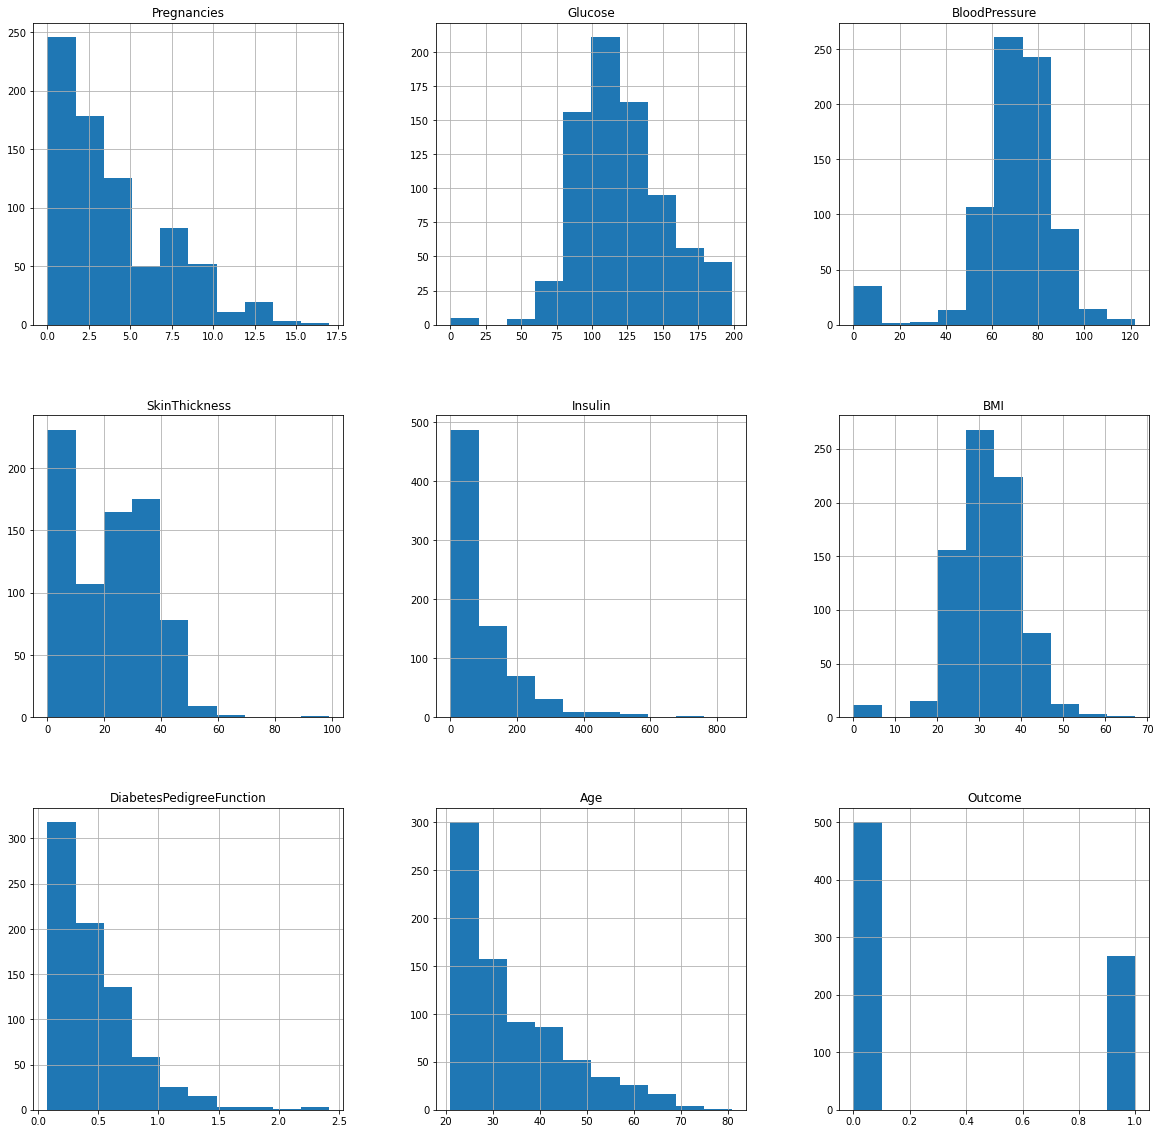

In [7]:
# Plots for all variables
dib_plot = dib.hist(figsize = (20,20))

In [8]:
X=dib.drop('Outcome',axis=1)
y=dib['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
model.coef_

(537, 8)
(231, 8)
(537,)
(231,)


array([[ 0.09015207,  0.03788137, -0.01348076,  0.0073593 , -0.00078482,
         0.0717975 ,  0.68609059,  0.03024816]])

In [9]:
ldapred = model.predict(X_test)
pan.crosstab(ldapred, y_test, rownames = ['predict'], colnames = ['test'])

test,0,1
predict,,
0,128,44
1,16,43


              precision    recall  f1-score   support

           0       0.74      0.89      0.81       144
           1       0.73      0.49      0.59        87

    accuracy                           0.74       231
   macro avg       0.74      0.69      0.70       231
weighted avg       0.74      0.74      0.73       231



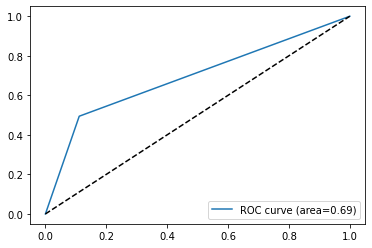

In [18]:
print(classification_report(y_test, ldapred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, ldapred)
roc_auc=auc(fpr, tpr)
roc_auc
plot.clf()
plot.plot(fpr, tpr, label = "ROC curve (area=%0.2f)" % roc_auc)
plot.plot([0,1], [0,1],'k--')
plot.legend(loc="lower right")

In [10]:
model.predict_proba(X_test)

array([[0.44408908, 0.55591092],
       [0.81638934, 0.18361066],
       [0.49302971, 0.50697029],
       [0.91380627, 0.08619373],
       [0.91730283, 0.08269717],
       [0.9597398 , 0.0402602 ],
       [0.92782398, 0.07217602],
       [0.70052808, 0.29947192],
       [0.94670667, 0.05329333],
       [0.63477373, 0.36522627],
       [0.93917863, 0.06082137],
       [0.76722638, 0.23277362],
       [0.07797904, 0.92202096],
       [0.69649567, 0.30350433],
       [0.90634252, 0.09365748],
       [0.28070604, 0.71929396],
       [0.23408671, 0.76591329],
       [0.96586562, 0.03413438],
       [0.92019341, 0.07980659],
       [0.07080553, 0.92919447],
       [0.69436562, 0.30563438],
       [0.52294256, 0.47705744],
       [0.65326372, 0.34673628],
       [0.76567172, 0.23432828],
       [0.85211316, 0.14788684],
       [0.33058071, 0.66941929],
       [0.73202557, 0.26797443],
       [0.99186936, 0.00813064],
       [0.33374035, 0.66625965],
       [0.15632485, 0.84367515],
       [0.

In [11]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.683982683982684


In [12]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[113  31]
 [ 42  45]]
              precision    recall  f1-score   support

           0       0.73      0.78      0.76       144
           1       0.59      0.52      0.55        87

    accuracy                           0.68       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.68      0.68      0.68       231



In [13]:
qda = QDA()
qda.fit(X_train, y_train)
qdapred = qda.predict(X_test)
pan.crosstab(qdapred, y_test, rownames = ['predict'], colnames = ['test'])

test,0,1
predict,,
0,118,45
1,26,42


In [14]:
print(np.mean(ldapred != y_test))
print(np.mean(qdapred != y_test))

0.2597402597402597
0.30735930735930733


              precision    recall  f1-score   support

           0       0.72      0.82      0.77       144
           1       0.62      0.48      0.54        87

    accuracy                           0.69       231
   macro avg       0.67      0.65      0.66       231
weighted avg       0.68      0.69      0.68       231



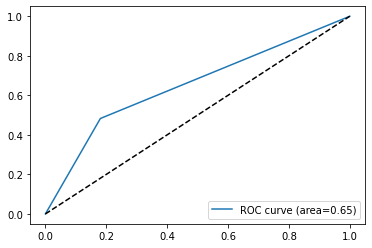

In [20]:
print(classification_report(y_test, qdapred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, qdapred)
roc_auc=auc(fpr, tpr)
roc_auc
plot.clf()
plot.plot(fpr, tpr, label = "ROC curve (area=%0.2f)" % roc_auc)
plot.plot([0,1], [0,1],'k--')
plot.legend(loc="lower right")